In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.style as style
import matplotlib.pyplot as plt
import pickle
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, classification_report
from sklearn.ensemble import GradientBoostingClassifier




In [2]:

def wrangle(path):
    """
    Perform data wrangling on the given dataset.
    
    Parameters:
        path (str): Path to the Excel file containing the dataset.
        
    Returns:
        df (DataFrame): Processed DataFrame after wrangling.
    """
    # Read the Excel file
    df = pd.read_excel(path, sheet_name="Data")
    
    # Select columns to be converted to categorical data type
    categorical_cols = df.columns.drop(['AMOUNT', 'DURATION', 'INSTALL_RATE', 'AGE', 'NUM_DEPENDENTS'])
    
    # Convert the selected columns to categorical datatype
    for col in categorical_cols:
        df[col] = df[col].astype('category')
    
    # Grouping related purposes into broader categories
    df['CONSUMER_GOODS'] = df[['NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV']].sum(axis=1)
    df['EDUCATION_CATEGORY'] = df[['EDUCATION', 'RETRAINING']].sum(axis=1)
    
    # Drop the original purpose columns
    df.drop(['NEW_CAR', 'USED_CAR', 'FURNITURE', 'RADIO/TV', 'EDUCATION', 'RETRAINING', 'OBS#'], axis=1, inplace=True)
    
    return df

# Specify the file path
filepath = "/users/rsmart/Downloads/Case Study Sample.xlsx"

# Perform data wrangling and assign the processed DataFrame to df
df = wrangle(filepath)


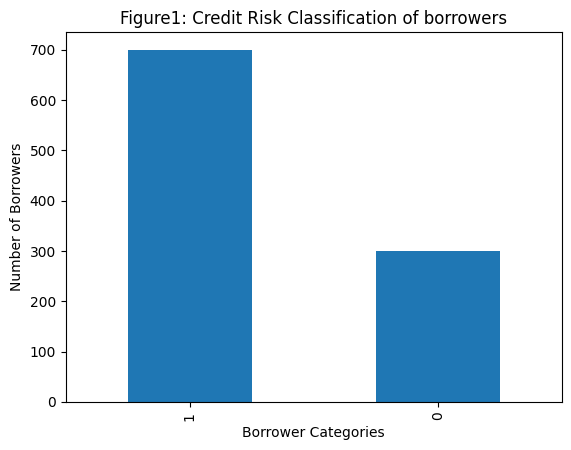

In [4]:
#Inspecting the Response Variable(Target Variable)
df['RESPONSE'].value_counts().plot(kind='bar')
#Customizing the plot
plt.xlabel('Borrower Categories')
plt.ylabel('Number of Borrowers')
plt.title('Figure1: Credit Risk Classification of borrowers');

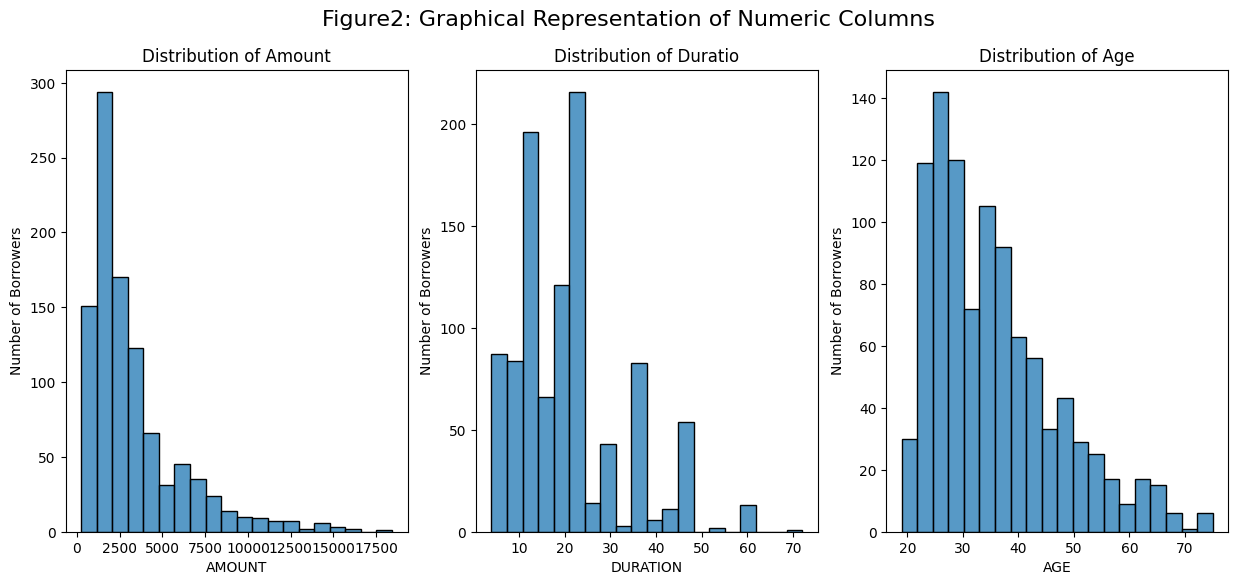

In [5]:
#Inspecting the Numerical Columns
# Create subplots
fig, ax = plt.subplots(1,3, figsize=(15, 6))

# Plot histograms
sns.histplot(data=df, bins=20, x='AMOUNT', ax=ax[0])
sns.histplot(data=df, bins=20, x='DURATION', ax=ax[1])
sns.histplot(data=df, bins=20, x='AGE', ax=ax[2])

# Add labels and legend
ax[0].set_ylabel('Number of Borrowers')
ax[1].set_ylabel('Number of Borrowers')
ax[2].set_ylabel('Number of Borrowers')

# Set titles for each subplot
ax[0].set_title('Distribution of Amount')
ax[1].set_title('Distribution of Duratio')
ax[2].set_title('Distribution of Age')
fig.suptitle('Figure2: Graphical Representation of Numeric Columns', fontsize=16);




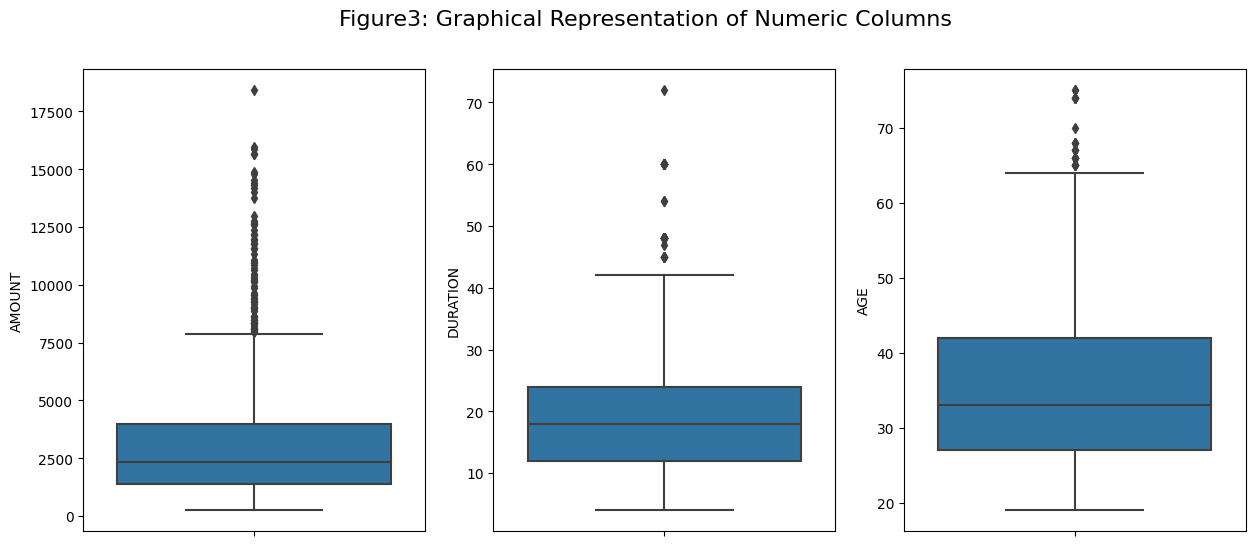

In [6]:
#Inspecting the Numerical Columns
# Create subplots
fig, ax = plt.subplots(1,3, figsize=(15, 6))

# Plot histograms
sns.boxplot(data=df,y='AMOUNT', ax=ax[0])
sns.boxplot(data=df,y='DURATION', ax=ax[1])
sns.boxplot(data=df,y='AGE', ax=ax[2])

fig.suptitle('Figure3: Graphical Representation of Numeric Columns', fontsize=16);

/var/folders/bw/pn34j21j20q14nzw3hjbcdzc0000gr/T/ipykernel_79988/2536991723.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


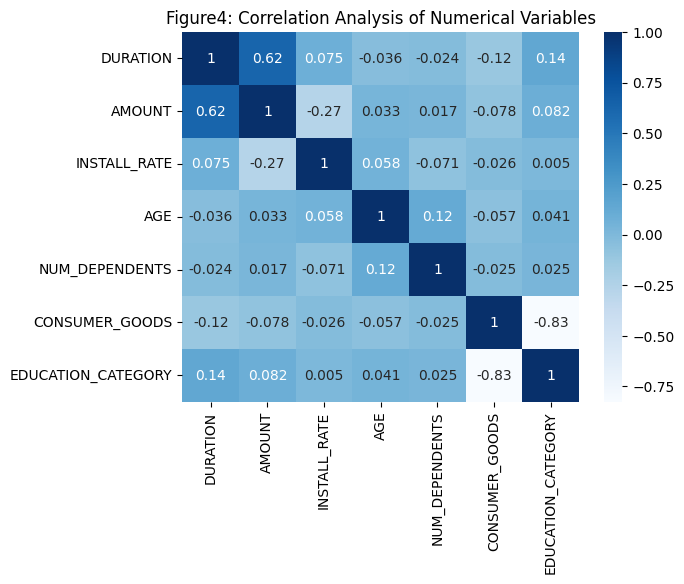

In [7]:
#Computing the Correlation Between Numerical Featues
correlation = df.corr()
#Displaying the correlation
sns.heatmap(correlation,annot=True,cmap='Blues',cbar=True)
plt.title('Figure4: Correlation Analysis of Numerical Variables');

In [8]:

def perform_chi_square_test(data, significance_level=0.05):
    """
    Perform the chi-square test of independence between categorical variables and the target variable.
    
    Parameters:
        data (DataFrame): The dataset containing categorical variables and the target variable.
        significance_level (float): Significance level for the test (default is 0.05).
        
    Returns:
        significant_vars (list): List of categorical variables with a significant relationship to the target.
    """
    significant_vars = []
    chi2_p_values = []
    
    # Dropping the RESPONSE since it is the target variable to be compared with the categorical columns
    for var in data.columns.drop('RESPONSE'):
        # Generating the contingency table of the two variables to be compared
        contingency_table = pd.crosstab(data[var], data['RESPONSE'])
        # Calculating the relationship between the compared variables
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        # Comparing the calculated p_value to the set significance_level
        if p_value < significance_level:
            significant_vars.append(var)
            chi2_p_values.append((var, chi2, p_value))

    # Sort variables based on p-values in ascending order
    chi2_p_values.sort(key=lambda x: x[2])

    for var, chi2, p_value in chi2_p_values:
        print(f"{var}: Chi2 = {chi2}, p-value = {p_value}")

    return significant_vars

# Investigating the Relationship between Categorical Variables
# Selecting Categorical Variables
categorical_vars = df.select_dtypes('category')

# Set significance level for the test
significance_level = 0.05

# Perform chi-square test
significant_categorical_vars = perform_chi_square_test(df, significance_level)

print("Significant Categorical Variables:", significant_categorical_vars)


CHK_ACCT: Chi2 = 123.72094351626559, p-value = 1.2189020722893845e-26
HISTORY: Chi2 = 61.691396964595505, p-value = 1.2791872956750962e-12
SAV_ACCT: Chi2 = 36.098928192418704, p-value = 2.761214238568249e-07
DURATION: Chi2 = 78.88693656911833, p-value = 7.784571960945828e-06
OWN_RES: Chi2 = 17.470703945382763, p-value = 2.9176928238124755e-05
PROP_UNKN_NONE: Chi2 = 15.061967189626756, p-value = 0.00010403852314250658
REAL_ESTATE: Chi2 = 13.659702407998498, p-value = 0.00021910622249086864
OTHER_INSTALL: Chi2 = 12.206068657681561, p-value = 0.00047634307982368293
EMPLOYMENT: Chi2 = 18.3682738466968, p-value = 0.0010454523491402541
RENT: Chi2 = 8.089071814328515, p-value = 0.004453296372143891
MALE_SINGLE: Chi2 = 6.159816487799175, p-value = 0.013068476586913557
FOREIGN: Chi2 = 5.82157591503386, p-value = 0.015830754902852868
EDUCATION_CATEGORY: Chi2 = 4.935419151750468, p-value = 0.026311680571007648
CONSUMER_GOODS: Chi2 = 4.915931979878976, p-value = 0.026610103197725478
Significant Ca

MODEL DEVELOPMENT

In [9]:
#Feature Transformation to remove skewness and outliers
Skewness=['AGE','AMOUNT','DURATION']
for feature in Skewness:
    df[feature]=np.log(df[feature])

In [10]:
#Initializing the Model to be Used
Model = GradientBoostingClassifier(random_state=123)


In [11]:
#Separating Data into the Target and Feature Variables
target = "RESPONSE"
Feature = df.drop(columns=target)
#Generating the Target and Feature Matrices
y = df[target]
X = Feature
#Dividing the Data Matrices into Training and Test Sets
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)
#Fitting the Training Data to the Model
Model.fit(X_train,y_train)

GradientBoostingClassifier(random_state=123)

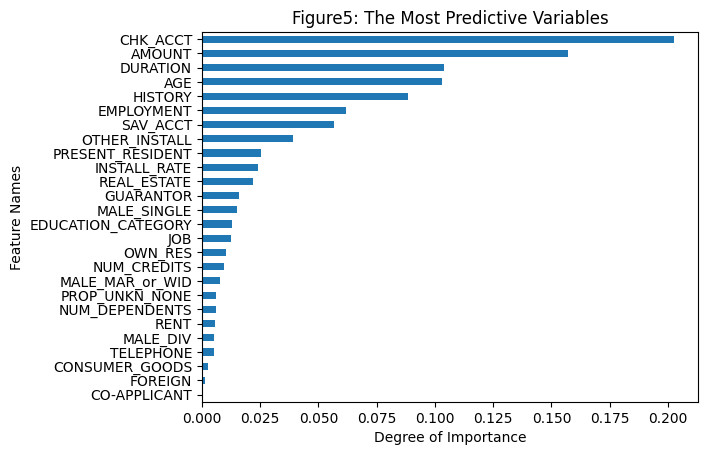

In [12]:
#Extracting the most Important features(Most Predictive Variables) from the model
Names = X_train.columns
Importances = Model.feature_importances_
#Generating a pandas series of the features and their importances
Feature_Importances = pd.Series(Importances, index=Names).sort_values(ascending=True)
#Displaying the Features with their degree of Importance.
Feature_Importances.plot(kind='barh')
plt.xlabel("Degree of Importance")
plt.ylabel("Feature Names")
plt.title("Figure5: The Most Predictive Variables");


              precision    recall  f1-score   support

           0       0.77      0.58      0.66        59
           1       0.84      0.93      0.88       141

    accuracy                           0.82       200
   macro avg       0.81      0.75      0.77       200
weighted avg       0.82      0.82      0.82       200



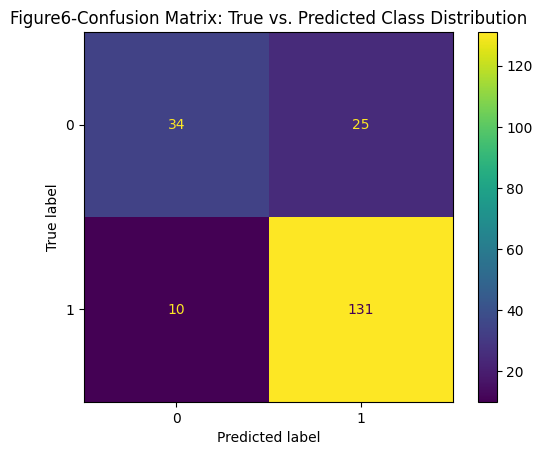

In [14]:
#Evaluating the model with the Test Data set
#Generating Model Predictions
y_predictions = Model.predict(X_test)
#Comparing predicted Class values and the Actual Values
print(ConfusionMatrixDisplay.from_estimator(Model,X_test,y_test))
plt.title("Figure6-Confusion Matrix: True vs. Predicted Class Distribution")
print(classification_report(y_test,Model.predict(X_test)));

In [121]:
#Saving the Model
with open('score_card.pkl','wb') as f:
    pickle.dump(Model,f)

In [129]:

def score_card(path):
    """
    Uses a trained model to make predictions on a new dataset and saves the results to a CSV file.
    
    Parameters:
        path (str): Path to the Excel file containing the new dataset.
        
    Returns:
        None
    """
    # Reading and preprocessing the new dataset
    df = pd.read_excel(path, sheet_name='Sheet1')
    df_new = wrangle(path)  # Assuming wrangle() is a preprocessing function
    
    # Feature Transformation to remove skewness and outliers
    Skewness = ['AGE', 'AMOUNT', 'DURATION']
    for feature in Skewness:
        df_new[feature] = np.log(df_new[feature])
    
    # Loading the saved model
    with open('score_card.pkl', 'rb') as f:
        loaded_model = pickle.load(f)
    
    # Making predictions using the loaded model
    predictions = loaded_model.predict(df_new)
    Results = pd.Series(predictions, name="RESPONSE", index=df["OBS#"])
    
    # Saving the results to a CSV file
    output = pd.DataFrame(Results)
    output.to_csv('Score_Card_Response.csv')

# Call the function with the path to the new dataset
""""This will require the user to input a path to the new data to be predicted"""
score_card('path_to_new_dataset.xlsx')


Exercise 1

Data Validation

1. **Duplicate Check**: Verified there were no duplicate entries in the dataset.
2. **Missing Values**: Confirmed absence of missing values across all columns.
3. **Data Type Alignment**: Adjusted variable data types to match column descriptions; converted binary and categorical variables to categorical types.
4. **Outlier Handling**: Addressed right-skewed distribution and outliers in 'AGE', 'DURATION', and 'AMOUNT' columns using log transformation.
5. **Category Mismatch**: Observed different categories in 'PRESENT_RESIDENT' column between data and description; Categories in data were [1,2,3,4] while those in description were [0,1,2,3].
6. **Class Imbalance**: Noted imbalanced RESPONSE variable; 'Yes' (1) Credit rating is good significantly outnumbered 'No' (0) Credit rating is good.


Exercise 2

Identifying the Most Predictive Variables.

The Most Predictive Variables for the Model were obtained from Figure5 shown above. Below are the first Top 10;
1. CHK_ACCT
2. AMOUNT
3. DURATION
4. AGE
5. HISTORY
6. EMPLOYMENT
7. SAV_ACCT
8. OTHER_INSTALL
9. PRESENT_RESIDENT
10. INSTALL_RATE